In [66]:
import os 
import tarfile
import urllib

### **Downloading Data**

In [67]:
root = 'https://raw.githubusercontent.com/ageron/handson-ml2/master/' # dataset url
path = os.path.join('datasets', 'housing')  # naming and joining two folders
url = root + 'datasets/housing/housing.tgz'

def fetch_data(data_url = url, data_path = path):
    os.makedirs(path, exist_ok = True)
    tgz_path = os.path.join(data_path, 'housing.tgz')
    urllib.request.urlretrieve(data_url, tgz_path)
    data_tgz = tarfile.open(tgz_path)
    data_tgz.extractall(path = path)
    data_tgz.close()
    
fetch_data()

### **Understanding Data**

In [68]:
# For loading data
import pandas as pd

def load_data(data_path = path):
    csv_path = os.path.join(data_path, 'housing.csv')
    return pd.read_csv(csv_path)

In [69]:
housing = load_data()
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [70]:
# info() method is used to get quick description of data specifically if we have null values
# objects can hold any kind of value
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [71]:
# describe method shows a summry of numerical attributes
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [72]:
# value counts gave number assosiated with each category
housing['ocean_proximity'].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

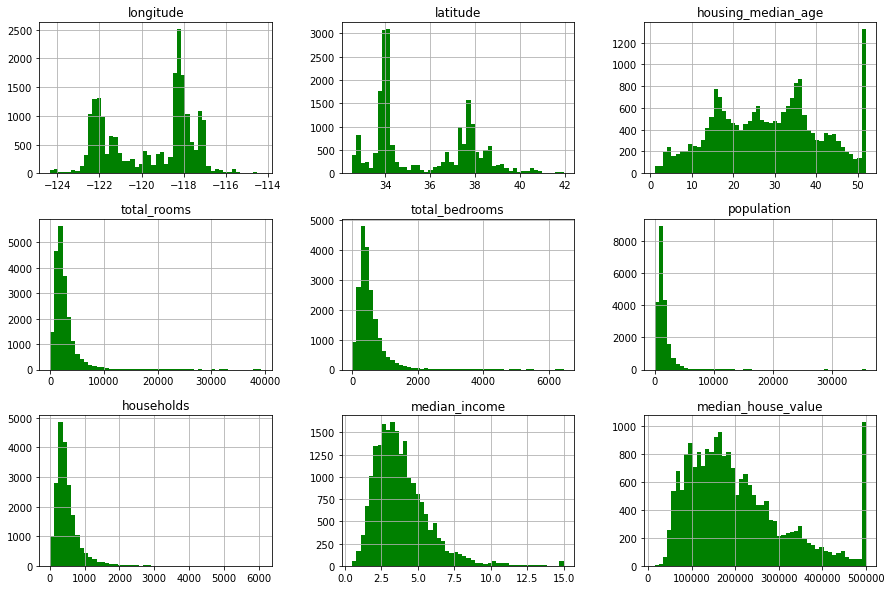

In [73]:
# Understanding data via histogram
# histogram give us information regarding range of data 
%matplotlib inline
import matplotlib.pyplot as plt

housing.hist(bins = 50, color = 'green',figsize = (15, 10))
plt.show()

 #### Understanding information giving in the histogram
 
 1. Median income is not expressed in US Dollars, Scaled at 15 - 0.5, 3 means above 30,000
 2. All attributes have different scale
 3. heavy tailed distribution are difficult for MC algo to detect patters (try to convert them in bell-shaped curve)

3    0.350581
2    0.318847
4    0.176308
5    0.114438
1    0.039826
Name: income_cat, dtype: float64


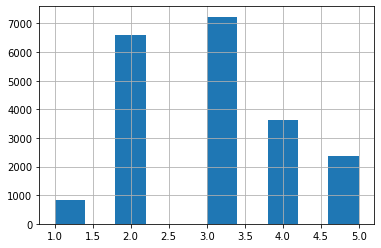

In [74]:
housing['income_cat'] = pd.cut(housing['median_income'], bins = [0., 1.5, 3.0, 4.5, 6.0, np.inf],
                               labels = [1,2,3,4,5] )
print(housing['income_cat'].value_counts()/len(housing))
housing['income_cat'].hist();

### **Creating Test Set**

If we estimate gernalization error (measure of how accurately an algorithm is able to predict outcome values for previously unseen data) using a test set, our estimate will be too optimistic and led to launch a system that will not perform as well as expected.

In [75]:
# Method 1
import numpy as np

def split_train_test(data, test_ratio):
    shuffled_indices = np.random.permutation(len(data))
    test_size = int(len(data) * test_ratio)
    test_indices = shuffled_indices[: test_size]
    train_indices = shuffled_indices[test_size :]
    return data.iloc[train_indices], data.iloc[test_indices]

In [76]:
train_set, test_set = split_train_test(housing, 0.15)

In [77]:
print(len(train_set))
print(len(test_set))

17544
3096


In [78]:
# Method 2
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(housing, test_size = 0.15, random_state = 20)

In [79]:
print(len(train_set))
print(len(test_set))

17544
3096


### **Stratified Sampling**

In stratified sampling the population is divided into homogenous subgroups called strata, and the right number of instances are sampled from each stratum to guarantee that the test set is representative of the overall population

It is important to have a sufficient number of instances in your dataset for each stratum or else the estimate of a stratum's importance may be biased. This means that you should should not have too many stratas and each stratum should be large enough

In [80]:
# stratified sampling
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits = 2, test_size = 0.15, random_state = 12)  # n_splits give number of test and train sets 
                                                                                   # nsplits will give 2 train set and 2 test set
for train_ix, test_ix in split.split(housing, housing['income_cat']):# housing[income] on which the stratums are made
    print("TRAIN:", train_ix, "TEST:", test_ix)

TRAIN: [11568 11140   811 ... 11219 16531  3484] TEST: [16955 17243 14276 ...  9452  1852 10365]
TRAIN: [17519 10935 17989 ... 11473 12250  9955] TEST: [10373 17137 15509 ...  5512  8042 18406]


In [81]:
for train_ix, test_ix in split.split(housing, housing['income_cat']):
    strat_train = housing.loc[train_ix]
    strat_test = housing.loc[test_ix]

In [82]:
# Sampling error without stratification

sampling_df = pd.DataFrame({ 'Overall': housing['income_cat'].value_counts()/len(housing),
                             'Stratified': strat_train['income_cat'].value_counts()/len(housing),
                             'Random': test_set['income_cat'].value_counts()/len(housing)})
sampling_df['Random Error'] = sampling_df['Overall'] - sampling_df['Random']
sampling_df['Stratified Error'] = sampling_df['Overall'] - sampling_df['Stratified']
sampling_df

,Overall,Stratified,Random,Random Error,Stratified Error
3,0.350581,0.297965,0.053004,0.297578,0.052616
2,0.318847,0.271027,0.048643,0.270203,0.047820
4,0.176308,0.149855,0.026211,0.150097,0.026453
5,0.114438,0.097287,0.016570,0.097868,0.017151
1,0.039826,0.033866,0.005572,0.034254,0.005959


In [83]:
# dropping income_cat from the stratified samples
for set_ in (strat_train, strat_test):
    set_.drop('income_cat', axis = 1, inplace = True)

### **Visualizing Data**

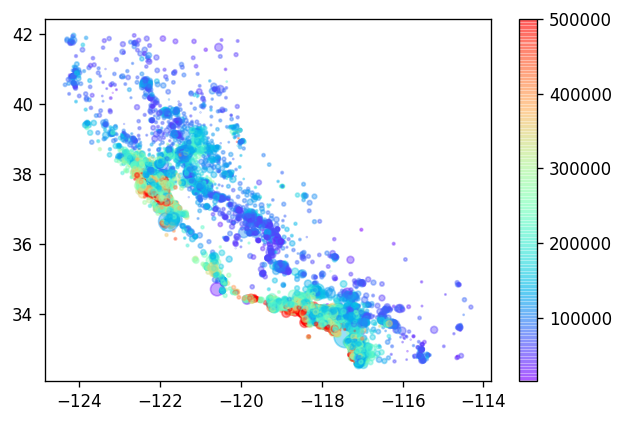

In [114]:
# making a copy of training data so that we dont harm the training data
housing = strat_train.copy()
fig = plt.figure(dpi = 120)
plt.scatter( x = housing['longitude'], y = housing['latitude'], alpha = 0.4,
             s = housing['population']/200, c = housing["median_house_value"], cmap = 'rainbow')
plt.colorbar();

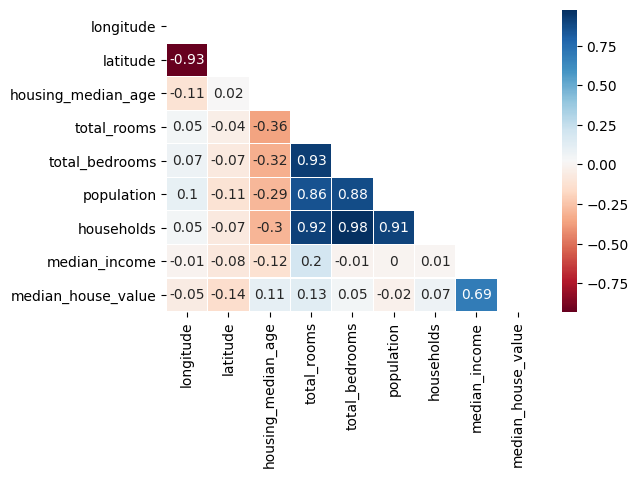

In [141]:
import seaborn as sns

# correlation between different attributes
# correlation only measures linear relationships
corr_matrix = np. round(housing.corr(), decimals = 2)
mask = np.zeros_like(corr_matrix)
mask[np.triu_indices_from(mask)] = True

fig = plt.figure(dpi = 100)
sns.heatmap(corr_matrix, mask = mask ,annot=True, linewidth = 0.1, cmap = 'RdBu');       

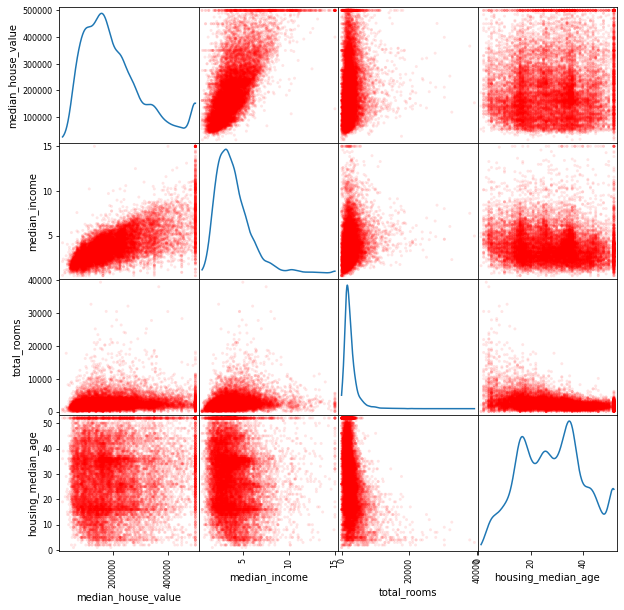

In [153]:
from pandas.plotting import scatter_matrix
attributes = ['median_house_value', 'median_income', 'total_rooms', 'housing_median_age']
scatter_matrix(housing[attributes], color = 'red', figsize = (10,10), alpha = 0.1, diagonal = 'kde');

1. The price cap that we noticed earlier is clearly visible as a horizontal line at 500,000
2. Try removing the corresponding districts to prevent your algorithms from learning to reproduce these data quirks